infinite random discrete values generator (integer number from given range):

In [0]:
def generator(n):
  while True:
    yield randrange(n)

visualize how probability of given numbers change in time:

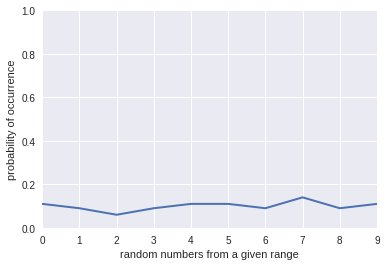

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randrange
from matplotlib import animation
from IPython.display import HTML
    
# set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

n = 10
count = np.zeros(n)
x_values = np.arange(0, n)
    
generator = generator(n)

ax.set_xlim(( 0, n-1))
ax.set_ylim((0, 1))
line, = ax.plot([], [], lw=2)

plt.xlabel('random numbers from a given range')
plt.ylabel('probability of occurrence')

# plot the background of each frame
def init():
  line.set_data([], [])
  return (line,)
  
# this is called sequentially
def animate(i):
  number = next(generator)
  count[number]+=1

  line.set_data(x_values, count/(i+1))
  return (line,)
  
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)
HTML(anim.to_jshtml())

visualize probability of occurrence for two consecutive numbers (all possible pairs) in the stream:

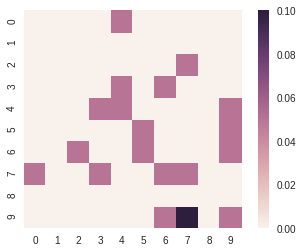

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
from matplotlib import animation, rc
from IPython.display import HTML

# set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots() 
line, = ax.plot([], [])

n = 10
count = np.zeros((n, n))
previous = 0
    
generator = generator(n)

# plot the background of each frame
def init():
  line.set_data([], [])
  return (line,)
  
# this is called sequentially
def animate(i):
  global current
  global previous 
    
  current = next(generator)
  count[previous][current]+=1
 
  previous = current
  data = count/(i+1)

  global ax
  ax.cla()
  plt.cla()
  plt.clf()

  ax = sns.heatmap(data, square=True)
  ax.plot()
  return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=100, blit=True)

HTML(anim.to_jshtml())

## Simulator for chances to be ill on a certain disease

We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

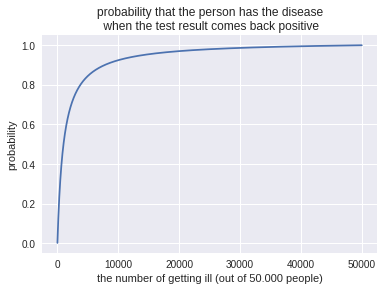

In [14]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# init
n = 50000 # the number of people
x = list(range(1,n + 1))
y = np.zeros(n)

# compute probability based on the bayes formula
for i in range(1,n + 1):
  disease = i/n
  positiveWhenDisease = 0.98
  positive = disease*0.98 + (1-disease)*0.02
  diseaseWhenPositive = positiveWhenDisease * disease / positive
  
  y[i-1] = diseaseWhenPositive

plt.title('probability that the person has the disease\n when the test result comes back positive')
plt.xlabel('the number of getting ill (out of 50.000 people)')
plt.ylabel('probability')
plt.plot(x,y)
plt.show()